In [1]:
import pandas as pd
import numpy as np
import bilby
import corner

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 23) 
mpl.rc('ytick', labelsize = 23)

In [3]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#eba75f'
my_color2_darker = '#f6b26b'

In [4]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/PhDThesisData/Bilby4GWFish/'

In [5]:
default_kwargs = dict(
            bins=50, smooth=0.9,
            smooth1d=0.8,
            show_titles=False,
            #title_kwargs=dict(fontsize=24),
            #title_fmt='.2f',
            title_quantiles=[0.16,0.5,0.84],
            label_kwargs = dict(color = 'black', fontsize = 24),
            truth_color='black', quantiles=[0.16, 0.84],
            levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
            plot_density=False, plot_datapoints=True, fill_contours=True,
            max_n_ticks=3, labelpad=0.
)

In [6]:
corner_lbs = [
              '$d_L$ [Mpc]',
              '$\iota$ [rad]'
            ]
title_labels = ['', ''] 

In [19]:
input_file = '30plus60_SNR8'
fig_label = 'dLiota_corner_30plus60_SNR8'

In [20]:
corner_params = ['luminosity_distance', 'theta_jn']

In [21]:
injections = pd.read_hdf(PATH_TO_DATA + 'CBC_pop_' + input_file + '.hdf5')
covm = np.loadtxt(PATH_TO_DATA + 'Inverse_Fisher_' + input_file + '.txt')[2:4, 2:4]
np.random.seed(42)
pe_gwfish = np.random.multivariate_normal(injections[corner_params].iloc[0].to_numpy(), covm, 100000)

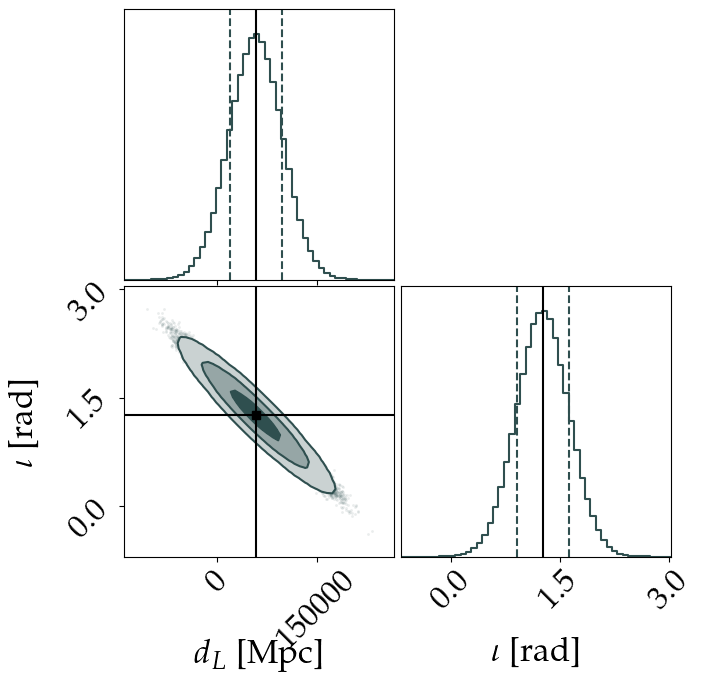

In [22]:
plot_name = fig_label
# Calculate the range dynamically with padding
padding = 0.1  # Extend range by 10%
data = pe_gwfish
data_min = np.min(data, axis=0)
data_max = np.max(data, axis=0)
data_range = [(low - padding * (high - low), high + padding * (high - low)) for low, high in zip(data_min, data_max)]

figure = corner.corner(
    pe_gwfish, 
    color=my_color_darker, 
    truths=injections[corner_params].iloc[0].to_numpy(),
    range=data_range,  # Use calculated range with padding 
    labels=corner_lbs, 
    rect=[0, 0, 1, 1],
    **default_kwargs
)
figure.subplots_adjust(wspace=0.025, hspace=0.025)
plt.subplots_adjust(left=0.00, bottom=0.0, right=0.995, top=0.995)
# Save the plot to a file
plt.savefig(f'plots/{plot_name}.pdf', bbox_inches='tight')  
# Display the plot
plt.show()
plt.close()